<div align="center">

# Exploring Earth-Like Exoplanets

#### Ankan Roy

</div>

<center><img src="https://images-assets.nasa.gov/image/GSFC_20171208_Archive_e002131/GSFC_20171208_Archive_e002131~large.jpg" width=400px height=400px />   <img src="https://assets.science.nasa.gov/dynamicimage/assets/science/astro/exo-explore/2024/03/TRAPPIST-1e.png" width=400px height=400px /></center>

## Inspiration

Are we alone? That is the question many astronomers ask when it comes to Earth. As we know it, Earth is the only planet we know of currently that can host life. There is a host of research going on to determine whether life exists in our solar system, but what about other solar systems within our galaxies? This is where the study of exoplanets come in.

An exoplanet is is a planet outside of our solar system, typically orbiting a star in our galaxy. According to NASA's Kepler Space Telescope, there are more planets than stars in the galaxy. Could one of these exoplanets host life similar to that of Earth? The purpose of this tutorial is to attempt at answering this question. We want to find out which exoplanets have similar features to that of Earth, so that we can assess its potential for habitability.

Read more about exoplanets here: https://science.nasa.gov/exoplanets/facts/

In this tutorial, we will use an exoplanet dataset to look for planets with features similar to Earth (such as size, orbital distance, and stellar conditions). Our goal isn’t to prove a planet is habitable, but to identify the most promising candidates for further study.

Along the way, you will practice the full data science lifecycle:
1. Data collection
2. Data processing
3. Exploratory data analysis & visualization
4. Model analysis & testing
5. Interpretation of results

By the end, you will have a reproducible workflow and a stronger intuition for how data scientists turn raw observations into evidence-based predictions. Enjoy!

## Part 1: Data Collection

Now that we have our inspiration, the first step to any data science workflow is to find a suitable dataset to perform our study. In this tutorial, we will be using the NASA Exoplanet Archive which is available on Kaggle.

Learn more about the dataset here: https://www.kaggle.com/datasets/franoisgeorgesjulien/nasa-exoplanet-archive-planetary-systems

The reason we are using this dataset because it contains rich planet, star, and orbital parameters of an exoplanet, as we will see. These features provide valuable information to estimate how “Earth-like” an exoplanet might be.

### Import Relevant Libraries

We start by importing a few core Python libraries used throughout the tutorial. pandas helps us load and manipulate tabular data with DataFrames, making it easy to filter, clean, and summarize the exoplanet dataset. NumPy provides fast numerical operations and array support, which we’ll use for calculations and transformations. In addition, Matplotlib will provide the tools for us to create visualizations.

In [1]:
# Import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Download and Import the Data

Navigate to the dataset link and download the CSV file. Place it somewhere accessible from your Python script or Jupyter Notebook.

In this tutorial, the file is saved in a folder named Datasets. We’ll load it into a pandas DataFrame called df, which will hold the table of exoplanet parameters we’ll clean and analyze in later steps. In other words, df will be our dataset.

In [2]:
df = pd.read_csv("/Users/ankanroy/MSML602 - Data Science/Final Project/Datasets/PSCompPars_2023.09.17_08.49.34.csv")

### Understanding the data

A useful step is to use the .head() function to view a portion of the dataset, in particular the first five rows of the dataset. This gives us a look at the dataset's columns and elements in each column.

In [3]:
df.head()

,pl_name,hostname,sy_snum,sy_pnum,disc_facility,disc_telescope,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Xinglong Station,2.16 m Telescope,326.03000,1.290,12.1,1.08,...,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,516.21997,1.530,12.3,1.09,...,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Okayama Astrophysical Observatory,1.88 m Telescope,185.84000,0.830,12.9,1.15,...,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,5.23133,2.331,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,W. M. Keck Observatory,10 m Keck I Telescope,1765.03890,2.774,12.6,1.12,...,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,6.61935,4.714,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Multiple Observatories,Multiple Telescopes,798.50000,1.660,13.5,1.20,...,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,6.21500,4.651,6.06428,0.000603,-0.000603


According to the table above, we can see that the NASA Exoplanet Archive has have 36 variables. A description of the variables is given in the Kaggle page, and it's always good practice to take a look at that first. However, which variables do we want to use for this experiment? This question brings us to the next step, which is data processing.

## Part 2: Data Processing

Data processing refers to the workflow of manipulating, transforming, and analyzing raw data to extract meaningful insights and prepare it for tasks in later steps such as machine learning. Particularly, we want to extract the key variables we are interested in for the experiment, as well as handling missing data.

Using df.info, we can print out a concise summary of our DataFrame. This shows how many rows and columns there are, the names and data types of each column, and how many non-missing (non-null) values each column has. This is a quick way to check the structure of the dataset and to see which columns contain missing data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pl_name         5514 non-null   object 
 1   hostname        5514 non-null   object 
 2   sy_snum         5514 non-null   int64  
 3   sy_pnum         5514 non-null   int64  
 4   disc_facility   5514 non-null   object 
 5   disc_telescope  5514 non-null   object 
 6   pl_orbper       5271 non-null   float64
 7   pl_orbsmax      5217 non-null   float64
 8   pl_rade         5495 non-null   float64
 9   pl_radj         5494 non-null   float64
 10  pl_bmasse       5488 non-null   float64
 11  pl_bmassj       5488 non-null   float64
 12  pl_bmassprov    5514 non-null   object 
 13  pl_dens         5402 non-null   float64
 14  pl_orbeccen     4749 non-null   float64
 15  pl_insol        3834 non-null   float64
 16  pl_eqt          4072 non-null   float64
 17  pl_orbincl      4224 non-null   f

If we want a visual representation of missing data, we can import the missingno library to a matrix plot where each variable is shown as a vertical bar. Present values are usually shown in a dark color, while missing values are shown as a clear color, making it easy to see which columns have a lot of missing data and whether there are any patterns in how the missing values occur.

<Axes: >

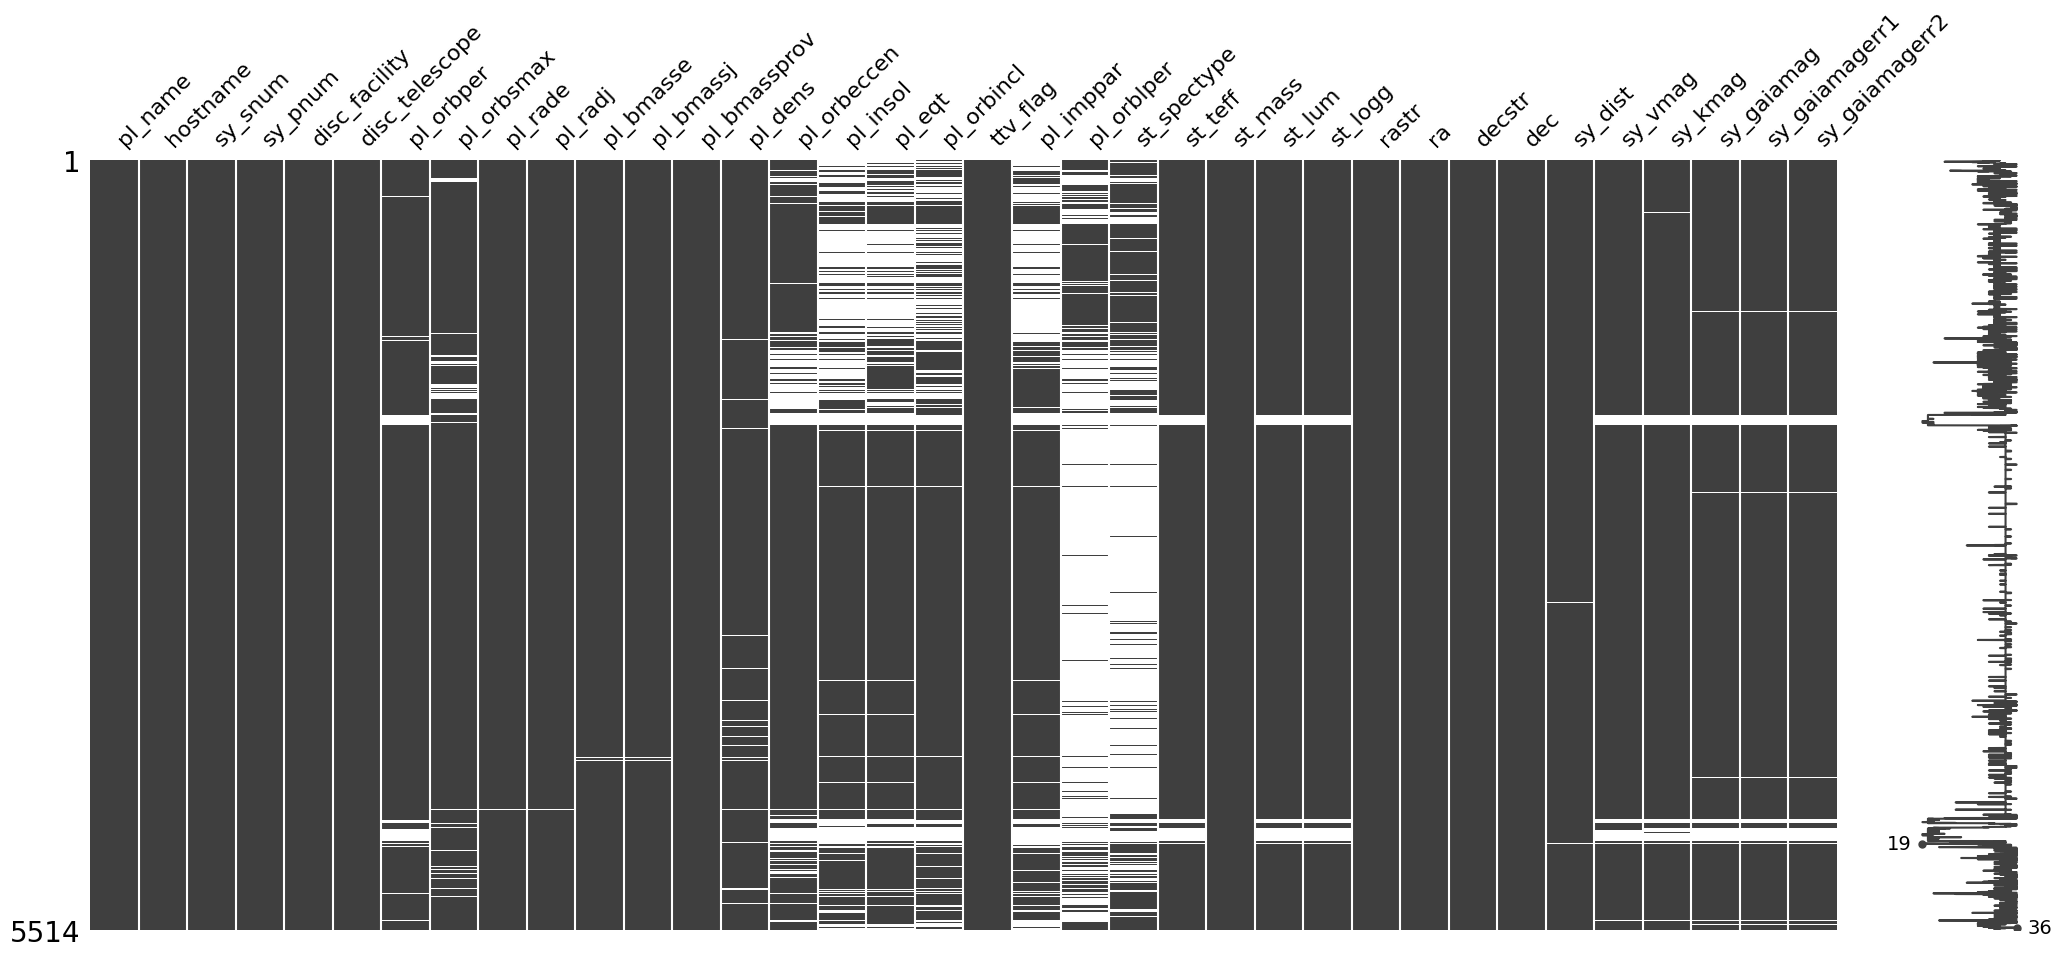

In [5]:
import missingno as msno

msno.matrix(df)

From this visualization, we can see that several variables have substantial amounts of missing data. On the right-hand side of the plot, the small bar chart shows how complete each row is (i.e., how many non-missing values each planet has). As good practice, we first decide which variables are important for our analysis and then decide how to handle missing values for those variables.

### Picking Features

In this step, we first define a list of columns called features that we want to keep from the full NASA Exoplanet Archive table, but we can see that the original variable names are not so intuitive. As a data scientist, it is imperative to go back to the dataset and also perform some research to understand what each variables mean. You can also rename the variables to something more understandable. For this experiment, we are using the following variables:

- planet_name: This is simply the name of the planet (e.g., "Kepler-1649 c").

- planet_radius (from pl_rade): Planet radius, measured in Earth radii. This tells us how big a planet is compared to Earth.

- planet_mass (from pl_bmasse): Planet mass, measured in Earth masses. Planets with higher mass tend to indicate thicker atmospheres or gas giants, which are less Earth-like.

- planet_density (g/cm**3) (from pl_dens): Mean density of the planet in g/cm³. Density combines radius and mass information to tell us how compact the planet is. Planets with similar densities are more likely to be rocky, like Earth, whereas low-density planets are usually puffy gas or ice giants. This makes density a key feature for identifying Earth-like composition.

- eccentricity (from pl_orbeccen): Orbital eccentricity, a dimensionless number describing how elliptical the orbit of the planet is. Eccentricity matters for climate stability, where planets with low eccentricity, like Earth, experience relatively steady insolation flux, which is favorable for a stable climate. Very high eccentricity can cause large temperature swings, making conditions less Earth-like.

- insolation_flux (from pl_insol): Stellar energy received at the planet, measured in units of Earth’s insolation. A value near 1 means the planet receives about the same energy from its star as Earth gets from the Sun. This is one of the most important parameters for potential habitability, because it controls the planet’s overall energy budget and, combined with the atmosphere, its possible surface temperature.

- equilibrium_temp (K) (from pl_eqt): The estimated equilibrium temperature of the planet in Kelvin, assuming a simple energy balance and no greenhouse effect. While it is a simplified estimate, it gives a first-order sense of how hot or cold the planet might be. Planets with equilibrium temperatures in the same range as Earth are more likely to have temperate conditions compatible with liquid water.

Taken together, these variables describe how big the planet is, how massive and dense it is, how it orbits its star, and how much energy it receives. That combination is exactly what we care about when asking how similar an exoplanet is to Earth. However, please feel free to add variables you may feel are significant to analyze as per your needs.

In [6]:
# Features to use for analysis (can add or remove as you like)
features = ["pl_name", "pl_rade", "pl_bmasse", "pl_dens", "pl_orbeccen", "pl_insol", "pl_eqt"]
df = df[features]

# Rename columns to something more understandable
rename_map = {
    "pl_name": "planet_name",
    "pl_rade": "planet_radius",
    "pl_bmasse": "planet_mass",
    "pl_dens": "planet_density (g/cm**3)",
    "pl_orbeccen": "eccentricity",
    "pl_insol": "insolation_flux",
    "pl_eqt": "equilibrium_temp (K)"
}
df = df.rename(columns=rename_map)
df.head()

,planet_name,planet_radius,planet_mass,planet_density (g/cm**3),eccentricity,insolation_flux,equilibrium_temp (K)
0,11 Com b,12.1,6165.60000,19.10,0.231,NaN,NaN
1,11 UMi b,12.3,4684.81420,13.80,0.080,NaN,NaN
2,14 And b,12.9,1525.50000,3.90,0.000,NaN,NaN
3,14 Her b,12.6,2559.47216,7.03,0.373,NaN,NaN
4,16 Cyg B b,13.5,565.73740,1.26,0.680,NaN,NaN


<Axes: >

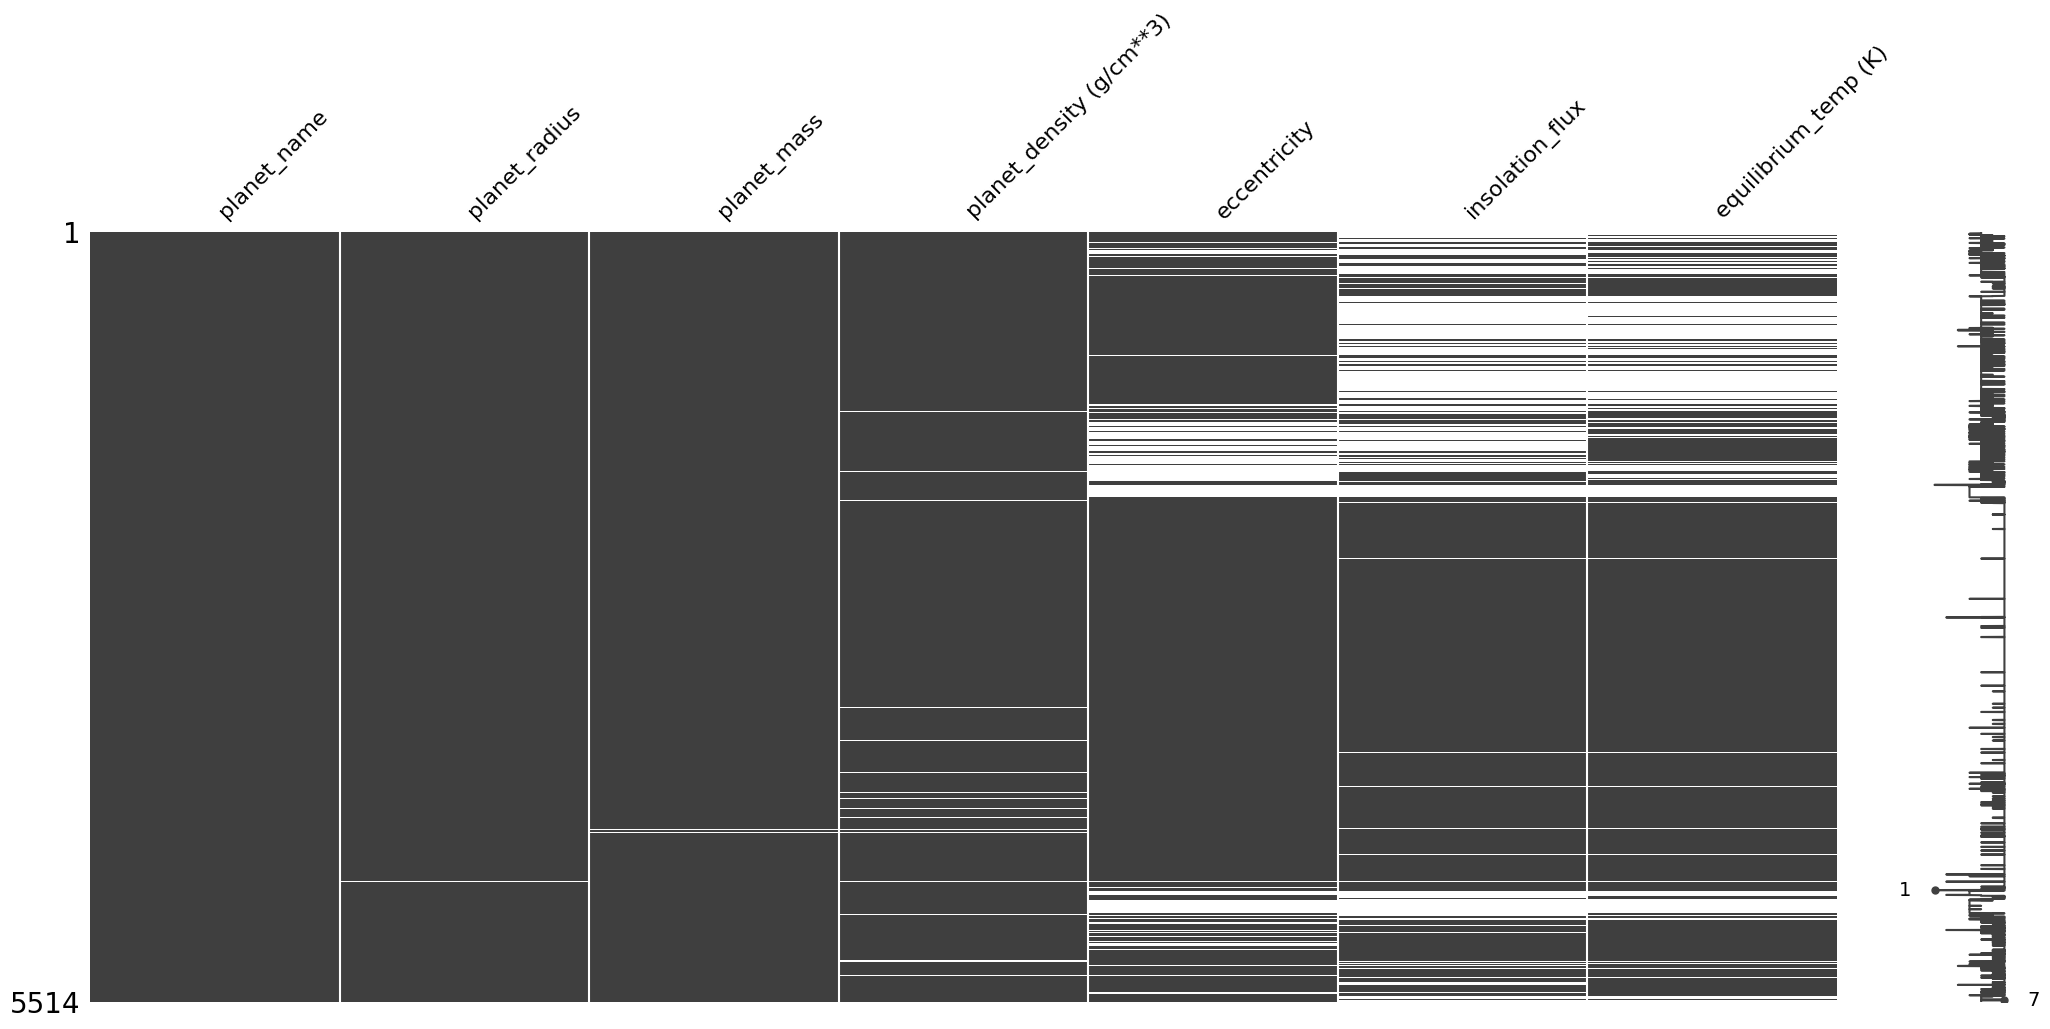

In [7]:
msno.matrix(df)

After selecting only the features that are relevant for Earth similarity, I run msno.matrix(df) again. The new plot shows the missingness pattern only for this smaller subset of variables. For the purposes of this project, I will simply drop rows with missing values so that the later PCA and clustering steps are easier to interpret.

In a more production-level setting, however, it is important to think carefully about imputation and about why data are missing. Data can be:
- MCAR (Missing Completely At Random) – the missingness is unrelated to any observed or unobserved values,

- MAR (Missing At Random) – the missingness depends on other observed variables, and

- MNAR (Missing Not At Random) – the missingness is related to the unobserved value itself.

Different types of "missingness" call for different imputation strategies, so dropping rows is a simplifying assumption for this exploratory experiment, not necessarily the best choice in general.

Learn more about the different types of missing data here: https://www.geeksforgeeks.org/machine-learning/types-of-missing-data-in-machine-learning/

In [8]:
df_og = df # Make a copy of the original just in case, this is good practice in case variables from the original dataframe need to be referenced again

df.dropna(inplace=True) # Drop the NaN values
print(len(df["planet_name"]))

3498


In [9]:
# Print out table again to check it
df.reset_index(drop=True, inplace=True)
df.head()

,planet_name,planet_radius,planet_mass,planet_density (g/cm**3),eccentricity,insolation_flux,equilibrium_temp (K)
0,55 Cnc e,1.875,7.990,6.660,0.050,2657.83,1958.0
1,AU Mic b,4.070,20.120,1.320,0.186,76.64,593.0
2,CoRoT-1 b,16.700,327.350,0.380,0.000,2852.63,1898.0
3,CoRoT-12 b,16.140,291.438,0.411,0.070,661.13,1442.0
4,CoRoT-13 b,9.920,415.704,2.340,0.000,546.53,1700.0


### Add Data for Earth

Since we want to compare exoplanets to Earth, it is also important to add in a data row for it. As we will see in later steps, this will be useful to see which exoplanets are the most similar to ours. Once we add this data, we are ready for some Exploratory Data Analysis (EDA)!

To add in the features for Earth, external research is required:
- planet_radius, planet_mass, & insolation_flux: since these are measuring the similarity to Earth, we can put these as 1.0
- planet_density & eccentricity: https://www.nasa.gov/wp-content/uploads/2009/12/earth_lithograph.pdf
- equilibrium_temp: https://wind.mit.edu/~emanuel/geosys/node2.html

In [10]:
# Define a dictionary and input features for Earth
earth_row = {
    "planet_name": "Earth",
    "planet_radius": 1.0,
    "planet_mass": 1.0,
    "planet_density (g/cm**3)": 5.51,
    "eccentricity": 0.0167,
    "insolation_flux": 1.0,
    "equilibrium_temp (K)": 255
}

# Create a new row for Earth in our dataframe
df = pd.concat([df, pd.DataFrame([earth_row])], ignore_index=True)
df[df["planet_name"] == "Earth"] # Let's take a look at our new row

,planet_name,planet_radius,planet_mass,planet_density (g/cm**3),eccentricity,insolation_flux,equilibrium_temp (K)
3498,Earth,1.0,1.0,5.51,0.0167,1.0,255.0


## Part 3: Exploratory Data Analysis (EDA)

In this project, exploratory data analysis (EDA) is the bridge between simply having a catalog of exoplanets and actually understanding which of them are acyually similar to Earth. At this point, we have selected a set of features also added Earth itself as a reference point. In general, EDA means using plots, summary statistics, and simple filtering to understand how these features are distributed across the known exoplanets, to not only spot patterns and outliers, but also to get an intuitive feel for what "similar to Earth" actually means.

First, let us import the seaborn library which will provide many tools, such as histograms, where we can visualize the distribution of our data.

Seaborn documentation here: https://seaborn.pydata.org/

In [11]:
import seaborn as sns

### Filter Out Gas Giants

Because the main goal is to identify planets that are physically comparable to Earth, the first EDA-driven decision task is to exclude gas giants (planets like Neptune) from the analysis. Gas giants can have very different internal structures and surface conditions from terrestrial planets, so including them would distort our similarity measures. Let's visualize some physical features of our exoplanets and Earth on a 1-D scatterplot.

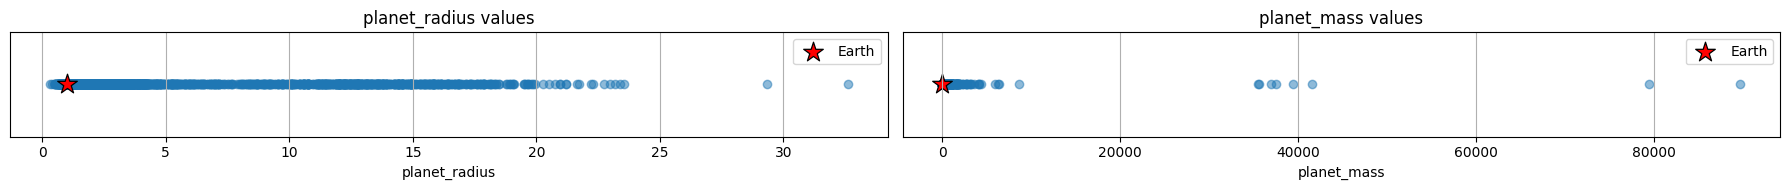

In [12]:
cols = ["planet_radius", "planet_mass"]
titles = ["planet_radius values", "planet_mass values"]

fig, axes = plt.subplots(1, 2, figsize=(18, 2))
axes = axes.ravel()

# Get the Earth row (assumes exactly one Earth)
earth = df[df["planet_name"] == "Earth"].iloc[0]

for i, (col, title) in enumerate(zip(cols, titles)):
    x = df[col].values
    y = np.zeros_like(x)  # all points on y = 0 since we want a 1-D scatterplot

    # Scatter all planets
    axes[i].scatter(x, y, alpha=0.5)

    # Earth highlighted as red star
    axes[i].scatter(earth[col], 0, color="red", s=220, marker="*", edgecolors="black", linewidths=0.9, label="Earth")
    axes[i].set_title(title)
    axes[i].set_xlabel(col)
    axes[i].set_yticks([])
    axes[i].set_ylabel("")
    axes[i].grid(axis="x")
    axes[i].legend()

plt.tight_layout()
plt.show()


As we can see, there are a lot of exoplanets that have significantly larger radius and mass than Earth. Those planets can be gas giants such as Jupiter and Neptune, so as mentioned before, we need to define a range of values that would be more akin to the features of Earth. To implement this, we define a boolean mask called rocky_mask that selects only planets with radius at most about twice Earth’s radius and mass at most about ten times Earth’s mass. You can define your own masks as you like. Afterwards, we reuse the code for tge 1-D plots to see how our distribtions changed.

In [13]:
rocky_mask = (
    (df["planet_radius"] <= 2.0) &
    (df["planet_mass"] <= 10.0)
)

df = df[rocky_mask]
df.reset_index(inplace=True, drop=True)
df.head()

,planet_name,planet_radius,planet_mass,planet_density (g/cm**3),eccentricity,insolation_flux,equilibrium_temp (K)
0,55 Cnc e,1.875,7.99,6.66,0.05,2657.83,1958.0
1,EPIC 211822797 b,1.920,4.35,3.38,0.06,3.50,431.0
2,EPIC 220674823 b,1.725,8.21,8.77,0.00,4670.00,2300.0
3,EPIC 249893012 b,1.950,8.75,6.39,0.06,1037.00,1616.0
4,GJ 1132 b,1.130,1.66,6.30,0.22,20.96,529.0


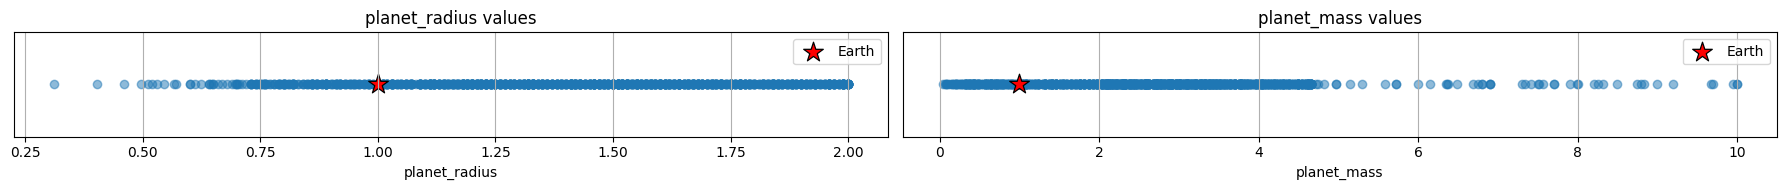

In [14]:
# Check out the graphs now that planet_radius and planet_mass has been masked

cols = ["planet_radius", "planet_mass"]
titles = ["planet_radius values", "planet_mass values"]

fig, axes = plt.subplots(1, 2, figsize=(18, 2))
axes = axes.ravel()

# Get the Earth row (assumes exactly one Earth)
earth = df[df["planet_name"] == "Earth"].iloc[0]

for i, (col, title) in enumerate(zip(cols, titles)):
    x = df[col].values
    y = np.zeros_like(x)  # all points on y = 0 since we want a 1-D scatterplot

    # Scatter all planets
    axes[i].scatter(x, y, alpha=0.5)

    # Earth highlighted as red star
    axes[i].scatter(earth[col], 0, color="red", s=220, marker="*", edgecolors="black", linewidths=0.9, label="Earth")
    axes[i].set_title(title)
    axes[i].set_xlabel(col)
    axes[i].set_yticks([])
    axes[i].set_ylabel("")
    axes[i].grid(axis="x")
    axes[i].legend()

plt.tight_layout()
plt.show()

### Which Variables are Skewed?

After restricting the dataset to likely rocky planets, the next step in the EDA is to check how each numerical feature is distributed. Many astrophysical quantities have different orders of magnitude, so they are often very skewed with long right tails. For example, most planets cluster near small values, with a few very large outliers. To quantify this, I wrote a small helper function, measure_skewto measure the skewness of each feature. I then interpret the skewness using a common rule of thumb: values with absolute skew less than about 0.5 are roughly symmetric, values between 0.5 and 1 are moderately skewed, and values above 1 are highly skewed.

In [15]:
# Function to measure the skew of numeric features
def measure_skew(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    skew_vals = df[num_cols].skew().sort_values(ascending=False)
    return skew_vals

measure_skew(df)

planet_density (g/cm**3)    15.479119
eccentricity                 7.504096
insolation_flux              4.612987
planet_mass                  1.014521
equilibrium_temp (K)         0.882394
planet_radius               -0.293766
dtype: float64

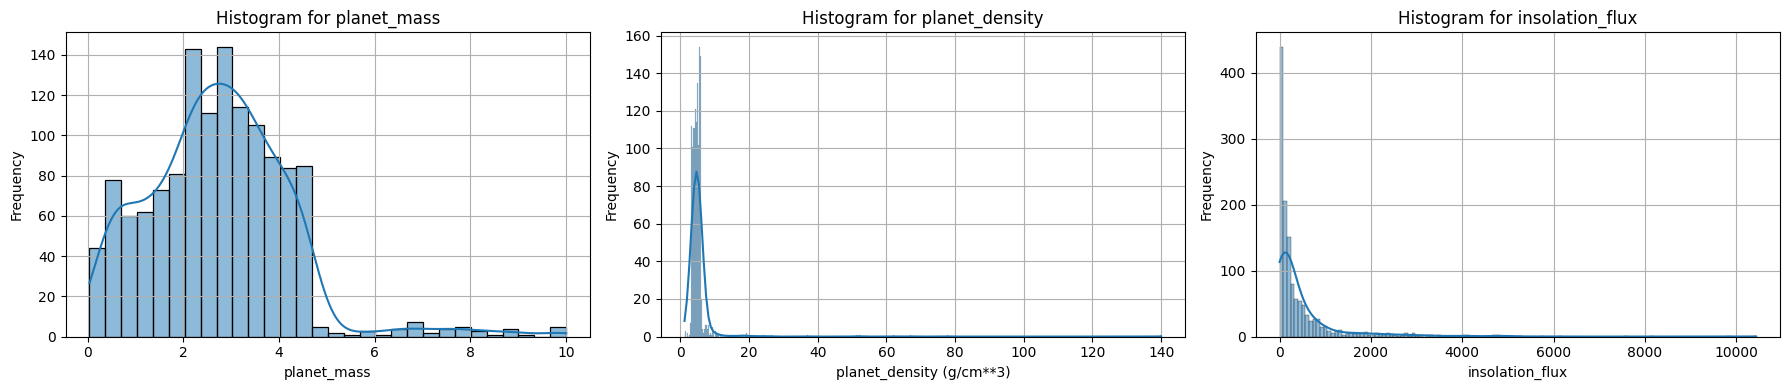

In [ ]:
cols = ["planet_mass", "planet_density (g/cm**3)", "insolation_flux"]

titles = ["Histogram for planet_mass", "Histogram for planet_density", "Histogram for insolation_flux"]

# Create subplots (1 row of 3 cols or graphs)
fig, axes = plt.subplots(1, 3, figsize=(18, 4)) 
axes = axes.ravel()  # make axes as a flat array for easy indexing

for i, (col, title) in enumerate(zip(cols, titles)):
    # Histogram from seaborn
    sns.histplot(df[col], kde=True, ax=axes[i]) # Add in KDE curve (KDE=True_) to visualize the general trend
    axes[i].set_title(title)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

For the variables that have significant skew, we would need to log-transform them. We log-transform highly skewed variables to make their distributions more symmetric and to compress very large values into a more manageable range. This reduces the impact of outliers and helps many models work better on the data. Based on this output, the variables that clearly need log transformation are planet density, insolation flux, and planet mass, because their skew values are all greater than 1 in magnitude and they represent strictly positive physical scales that can sensibly be expressed on a logarithmic axis. Applying a log10 transform to these columns compresses the long right tail and makes the distributions more symmetric, which is important before techniques such as PCA which we will be seeing next. Equilibrium temperature is only moderately skewed, so it can be left in linear units or optionally logged depending on how strongly we want to normalize it. Planet radius is already close to symmetric and does not require a transform.  Read more about log transformations here: https://www.geeksforgeeks.org/data-science/log-transformation/

In [17]:
# The features we want to log-transform
log_cols = ["planet_mass", "planet_density (g/cm**3)", "insolation_flux"]

# Log-transform variables
for c in log_cols:
    df[c] = np.log10(df[c])

measure_skew(df)

eccentricity                7.504096
planet_density (g/cm**3)    3.257906
equilibrium_temp (K)        0.882394
planet_radius              -0.293766
insolation_flux            -0.581906
planet_mass                -1.465080
dtype: float64

NOTE: Eccentricity is a special case. Although its skew is large, it is a bounded variable between 0 and 1, and taking a logarithm would behave badly if tehre are zero values. Instead of log-transforming it, it is safer to leave eccentricity as it is. Let's check the range of values for the variable.

In [18]:
min_value_col = df["eccentricity"].min()
max_value_col = df["eccentricity"].max()

print(f"Range for eccentricity: Min = {min_value_col}, Max = {max_value_col}")

Range for eccentricity: Min = 0.0, Max = 0.8


Since we have confirmed that the eccentricity variable has 0.0 as its minimum value, we should not log-transform it for the aforementioned reason that logarithms do not work well with zero values. We can see what happens in the following code block.

In [19]:
df_temp = df.copy()
df_temp["eccentricity"] = np.log10(df_temp["eccentricity"])

min_value_col = df_temp["eccentricity"].min()
max_value_col = df_temp["eccentricity"].max()
print(f"Range for eccentricity: Min = {min_value_col}, Max = {max_value_col}")

Range for eccentricity: Min = -inf, Max = -0.09691001300805639


/opt/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


As we can see, we run into a RuntimeWarning, stating that a divide by zero operation is occuring. This results in a minimum value of -inf for that data, which is not healthy for this analysis. This sub-exercise on exploring eccentricity was essentially to show how much fine-grained thinking goes into our data analysis.

Therefore, after applying the log transform, the skewness of our variables changes noticeably. Previously, planet density, planet mass, and insolation flux had very large positive skew values, meaning there were long right tails dominated by a few extreme planets. After the transformation, their skewness drops to much smaller magnitudes. Overall, this tells us that the log transformation did its job in compressing extreme values and making the distributions more balanced, which is important for the upcoming Principal Component Analysis (PCA). We can reuse our code from before to see how the skew has changed.

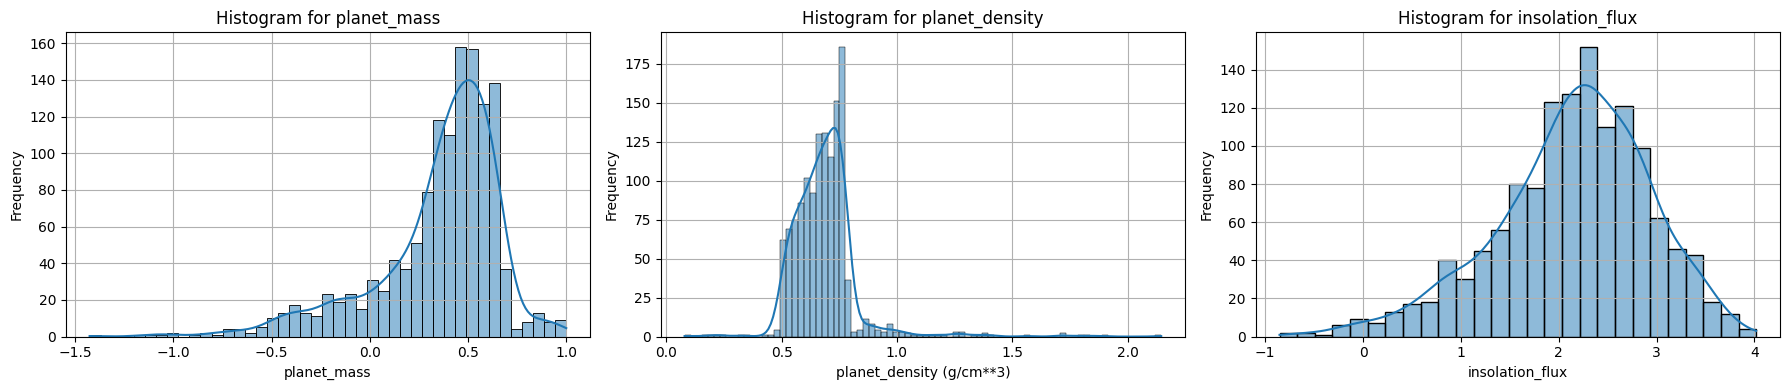

In [ ]:
# Check out the graphs now that planet_mass, planet_density (g/cm**3), and insolation_flux has been log-normalized

cols = ["planet_mass", "planet_density (g/cm**3)", "insolation_flux"]

titles = ["Histogram for planet_mass", "Histogram for planet_density", "Histogram for insolation_flux"]

# Create subplots (1 row of 3 cols or graphs)
fig, axes = plt.subplots(1, 3, figsize=(18, 4)) 
axes = axes.ravel()  # make axes as a flat array for easy indexing

for i, (col, title) in enumerate(zip(cols, titles)):
    # Histogram from seaborn
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Principal Component Analysis (PCA)

PCA is a powerful dimensionality reduction technique in data science that simplifies complex, high-dimensional data by reducing its dimensions, creating fewer new variables (principal components) that capture most of the original data's important patterns and variance, making it easier to visualize and analyze without significant information loss. Read more about PCA here: https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/

In this experiment, PCA is used to take our six correlated planetary features—radius, mass, density, eccentricity, insolation flux, and equilibrium temperature—and summarize them into a smaller number of principal components. Each principal component is a weighted combination of the original variables that captures as much variance as possible. This is helpful because it allows us to visualize the structure of the data in just two dimensions while still retaining most of the information, while also provides a more compact space in which to run upcoing machine learning algorithms such as clustering.

To start with PCA, we extract only the six numerical feature columns (excluding planet_name) and store it in a variable, in this case, X1_raw. Then, we need to standardize these features using StandardScaler. Standardization is a preprocessing step where we rescale each feature so that it has mean 0 and standard deviation 1. This puts all variables on the same footing so that a feature measured in large units does not dominate another feature that has a smaller range. Mathematically, for each column we subtract the column’s mean and then divide by its standard deviation. After standardization, most values for each feature lie within a few standard deviations of zero. Read more about standardization here: https://www.geeksforgeeks.org/machine-learning/what-is-standardization-in-machine-learning/

In scikit-learn, StandardScaler is the class that performs standardization. The fit_transform call is doing two steps at once. First, fit computes the mean and standard deviation of each column in X1_raw and stores those values inside the scaler object. Second, transform uses those stored means and standard deviations to standardize the data to every entry. The combined fit_transform method is a convenience that runs both steps in one line on the same dataset, which is exactly what we want when preparing our data for PCA or clustering. The result of fit_transform is a NumPy array of standardized values, which we then wrap back into a DataFrame called X1 with the same feature names as columns. In other words, X1 is just the standardized version of X1_raw which has the same six planetary features, but now each one has mean 0 and standard deviation 1.

StandardScaler documentation from sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [21]:
from sklearn.preprocessing import StandardScaler

X1_raw = df.iloc[:, 1:7] # Extract the numerical features

# Standardize features into new dataframe X1
scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1_raw)
X1 = pd.DataFrame(X1, columns=["planet_radius", "planet_mass", "planet_density (g/cm**3)", "eccentricity", "insolation_flux", "equilibrium_temp (K)"])

In [22]:
# Visualize scaled dataframe
X1.head()

,planet_radius,planet_mass,planet_density (g/cm**3),eccentricity,insolation_flux,equilibrium_temp (K)
0,1.332421,1.728314,0.958099,0.722808,1.622421,2.379226
1,1.461697,0.905156,-1.066105,0.912546,-2.013289,-1.274399
2,0.901502,1.765087,1.779479,-0.225886,1.931394,3.197523
3,1.547881,1.851328,0.834586,0.912546,1.106500,1.560929
4,-0.807813,-0.399081,0.792252,3.948366,-1.032153,-1.039916


Now that we have our standardized data stored in X1, we can work on implementing and visualizing the PCA. In the first step, we import the PCA class from sklearn and create a PCA model that will keep two principal components by setting n_components=2. When you call pca.fit_transform(X1), PCA learns how to rotate the standardized feature space so that the first new axis (PC1) captures as much variation in the data as possible, and the second axis (PC2) captures as much of the remaining variation as possible, subject to being orthogonal to the first.

PCA documentation from sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

The result, stored in pc, is a NumPy array where each row is a planet and the two columns are the coordinates of that planet in the new PC1–PC2 space. You then create a scatter plot of pc[:,0] versus pc[:,1] to visualize how all the planets are distributed along these two principal components before applying any clustering. The following plot gives you a two-dimensional "map" of your six-dimensional feature space.

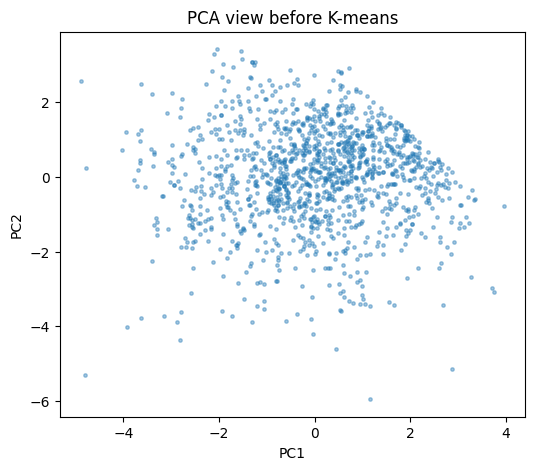

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(X1)

plt.figure(figsize=(6,5))
plt.scatter(pc[:,0], pc[:,1], s=6, alpha=0.4)
plt.title("PCA view before K-means")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

Next, you compute the PCA loadings and store them in a DataFrame called loadings. The expression pca.components_ returns the principal component directions as rows. By transposing with .T, you turn them into columns aligned with your original features. You then use X1.columns as the index, so each row corresponds to one of your original standardized features (planet radius, planet mass, density, eccentricity, insolation flux, and equilibrium temperature), and the two columns PC1 and PC2 give the weights (coefficients) of each feature in each principal component. Printing loadings shows how strongly and in what direction each feature contributes to PC1 and PC2. For example, a large positive value means that increasing that feature pushes a planet in the positive direction along that principal component.

In [24]:
loadings = pd.DataFrame(pca.components_.T, index=X1.columns, columns=["PC1", "PC2"])

print(loadings)

                               PC1       PC2
planet_radius             0.539113  0.425392
planet_mass               0.461354  0.386976
planet_density (g/cm**3) -0.307058 -0.229392
eccentricity              0.061968 -0.291106
insolation_flux          -0.444338  0.522697
equilibrium_temp (K)     -0.448273  0.508641


Now, we focus on understanding which features are most important for PC1. By taking loadings["PC1"].abs() you look at the absolute values of the loadings for PC1 (ignoring the sign) and then sort them in descending order. This tells us which features contribute the most to PC1 in terms of magnitude.

In [25]:
# features most responsible for PC1
loadings["PC1"].abs().sort_values(ascending=False)

planet_radius               0.539113
planet_mass                 0.461354
equilibrium_temp (K)        0.448273
insolation_flux             0.444338
planet_density (g/cm**3)    0.307058
eccentricity                0.061968
Name: PC1, dtype: float64

The output shows that planet_radius has the largest loading on PC1, followed by planet_mass, equilibrium_temp (K), and insolation_flux, while planet_density and eccentricity contribute less. This means that PC1 is mainly a combined "size and climate" axis, wherein planets with larger radius and mass and particular combinations of insolation and equilibrium temperature will be located further along PC1. We repeat the same analysis for PC2.

In [26]:
# features most responsible for PC2
loadings["PC2"].abs().sort_values(ascending=False)

insolation_flux             0.522697
equilibrium_temp (K)        0.508641
planet_radius               0.425392
planet_mass                 0.386976
eccentricity                0.291106
planet_density (g/cm**3)    0.229392
Name: PC2, dtype: float64

The output for PC2 suggests that it is another "climate-related" axis, strongly driven by how much stellar energy the planet receives and its equilibrium temperature, with some influence from size. Together, the rankings for PC1 and PC2 tell you that both components are primarily capturing variations in planetary size and energy balance, which makes sense in the context of Earth similarity.

Finally, we can examine the explained variance ratio, which returns the proportion of the total variance in the standardized data that is captured by each principal component. The following output arrayshows PC1 explains about 37.5% of the total variance and PC2 explains about 29.9%. Taken together, the first two principal components capture roughly 67% of the overall variation in your six features. This tells us that plotting and clustering in the two-dimensional PC1–PC2 space retains most of the structure in the data while still being simple enough to visualize and interpret, making these components a reasonable low-dimensional representation for our upcoming K-means clustering and Earth-similarity analysis.

In [27]:
pca.explained_variance_ratio_

array([0.37467191, 0.29851232])

## Part 4: Machine Learning

### K-Means

K-Means is an unsupervised clustering algorithm that groups points into a chosen number of clusters based on how close they are to each other in feature space. In this code, we tell K-Means to find 3 clusters in the 2D PCA space (pc), get a cluster label for each planet (y_kmeans), and compute the coordinates of the cluster centers (centers). The scatter plot then shows each planet colored by its cluster, with the black "x" markers indicating the centroids of those clusters.

Sklearn documentation for K-Means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

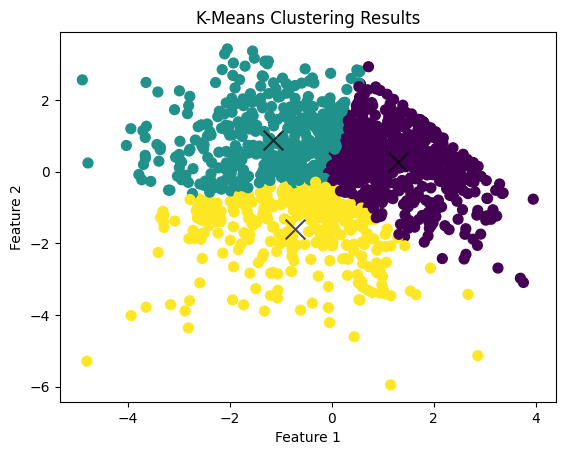

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(pc)

centers = kmeans.cluster_centers_

plt.scatter(pc[:, 0], pc[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.7, marker="x")
plt.title("K-Means Clustering Results")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

One question to ask is: what is a "good" value of $k$ for K-Means? If we pick a very small $k$, the clusters will be too broad and lump together planets that are quite different. On the other hand, a very large $k$ will over-fragment the data into many tiny clusters that are hard to interpret. One common way to choose a reasonable $k$ is the elbow method, where we run K-Means for a range of $k$ values and record the "within-cluster sum of squares" (WCSS) which mesures how far points are from their cluster centers. As $k$ increases, this score always goes down, but we look for a point where the improvement starts to slow down and the curve bends like an elbow. That point is a good candidate for the number of clusters to use. For example, in the following elbow method, a the elbow point is around $k = 4$. Using the new $k$ value, we can now re-do the K-Means. We can also add code to label which cluster Earth is situated in.

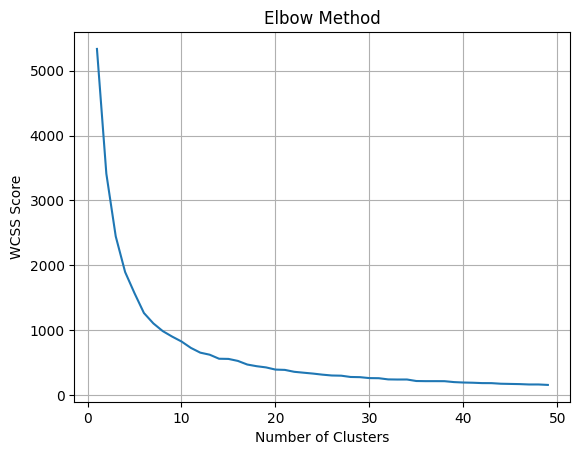

In [29]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pc)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 50), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Score")
plt.grid()
plt.show()

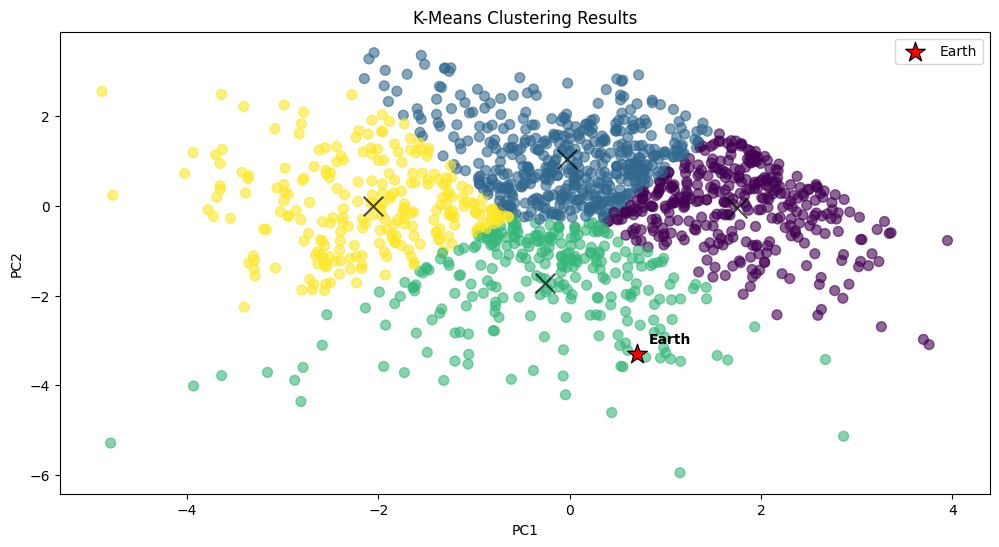

Earth Cluster: 2


In [30]:
# Run K-Means on the 2D PCA coordinates with k = 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(pc)
centers = kmeans.cluster_centers_

plt.figure(figsize=(12,6))
plt.scatter(pc[:, 0], pc[:, 1], c=y_kmeans, s=50, cmap="viridis", alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.7, marker="x")

# Highlight Earth
earth_mask = df["planet_name"] == "Earth" # Create a boolean mask for Earth
earth_idx = df.index[earth_mask][0] # Get the index of the Earth row from the mask
earth_pc = pc[earth_idx] # Extract Earth's coordinates in the PCA space
plt.scatter(earth_pc[0], earth_pc[1], c="red", s=220, marker="*", edgecolors="black", linewidths=0.9, label="Earth")
plt.annotate("Earth", (earth_pc[0], earth_pc[1]), textcoords="offset points", xytext=(8,8), fontsize=10, weight="bold")

plt.title("K-Means Clustering Results")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

print("Earth Cluster:", y_kmeans[earth_idx])

## Part 5: Interpretation of Results 

Perfect! Now that we know which cluster Earth belongs to, let's find out a little more about the planets in this cluster before we can see which exoplanets are most similar. Let us first add the K-Means cluster labels back into the main DataFrame as a new column called "cluster". To do this, we will use the earth_mask to look up which cluster Earth was assigned to, and store that cluster ID in the earth_cluster variable. Next, we filter the DataFrame to keep only those rows whose cluster value matches Earth’s cluster, creating a new DataFrame earth_cluster_df that contains only the Earth cluster planets. From here, you’re in a great position to summarize the properties of this cluster and then rank the planets within it by their similarity to Earth.

In [31]:
df["cluster"] = y_kmeans
earth_cluster = df.loc[earth_mask, "cluster"].iloc[0]
earth_cluster_df = df[df["cluster"] == earth_cluster].copy()
earth_cluster_df.reset_index(inplace=True)

feature_cols = df.columns[1:7] # The features we care about
cluster_summary = df.groupby("cluster")[feature_cols].median() # Output median feature values grouped by cluster
cluster_summary.reset_index(inplace=True)
cluster_summary["cluster"] += 1
cluster_summary

,cluster,planet_radius,planet_mass,planet_density (g/cm**3),eccentricity,insolation_flux,equilibrium_temp (K)
0,1,1.75,0.575188,0.577492,0.0,1.613207,643.0
1,2,1.55,0.489958,0.659916,0.0,2.580691,1119.5
2,3,1.15,0.217484,0.752816,0.0,1.648360,669.0
3,4,1.03,0.049218,0.734800,0.0,2.792280,1267.0


From the output, we can see that the clusters correspond to different regimes in our feature space. For example, Cluster 1 has the largest median radius (about 1.75 Earth radii) and relatively low median density and very high equilibrium temperature, suggesting it is dominated by hotter, somewhat larger "super-Earths". Cluster 3 and Cluster 4 have smaller median radii (around 1.15 and 1.03 Earth radii, respectively), with Cluster 4 also having the highest median insolation flux and equilibrium temperature, which points to compact, very hot planets close to their stars. Cluster 2, which is Earth's cluster, has a median radius of about 1.55 Earth radii and a median density that is higher than Cluster 1 but similar to Clusters 3 and 4. Its median insolation flux and equilibrium temperature are also quite high compared with the other clusters, indicating that, although Earth itself is temperate, most planets in Earth’s cluster tend to be hotter super-Earths receiving more stellar flux than Earth does. This is a useful reminder that Earth is just one member of the cluster and that the cluster as a whole represents an "Earth-adjacent" regime in feature space rather than a perfect collection of Earth twins.

At this point, we have isolated the cluster that contains Earth, so the final step in the pipeline is to quantify exactly how similar each planet in that cluster is to Earth. To do this, we first focus on the numerical features we care about for similarity (such as radius, mass, density, and the climate-related variables) and extract Earth’s values for those features as a reference point. We then computes the Euclidean distance between Earth and every other planet in the same cluster in this feature spac. This distance is the straight-line distance in the multi-dimensional space defined by our standardized and log-transformed variables, so smaller distances mean the planet’s properties are more similar to Earth’s.

Once these distances are computed,we sort the planets by this distance and displays the closest ones, which gives us a ranked list of the exoplanets whose physical and orbital characteristics are most similar to Earth under our chosen feature set and preprocessing steps. This sets the stage for the last part of the analysis, where we can interpret these top Earth-like candidates.

In [ ]:
from scipy.spatial.distance import euclidean

# Extract the Earth row
earth_row_index = earth_cluster_df[earth_cluster_df["planet_name"] == "Earth"].index[0]
earth_row = earth_cluster_df.iloc[earth_row_index][feature_cols].to_numpy()

# Calculate Euclidean distance for each row and store it in earth_cluster_df
distances = earth_cluster_df[feature_cols].apply(lambda row: euclidean(row.to_numpy(), earth_row), axis=1)

# Print out the top 5 most similar exoplanets to earth
earth_cluster_df = earth_cluster_df.drop(columns=["index"]).reset_index(drop=True) 
earth_cluster_df["dist_to_earth_raw"] = distances
earth_cluster_df.sort_values("dist_to_earth_raw").head(6) # Show features for Earth + subsequent 5 closest exoplanets

,planet_name,planet_radius,planet_mass,planet_density (g/cm**3),eccentricity,insolation_flux,equilibrium_temp (K),cluster,dist_to_earth_raw
270,Earth,1.000,0.000000,0.741152,0.0167,0.000000,255.0,2,0.000000
263,TRAPPIST-1 e,0.920,-0.159894,0.690338,0.0051,-0.187087,250.0,2,5.006964
258,TOI-700 d,1.073,0.096910,0.745075,0.0420,-0.070581,269.0,2,14.000727
215,Kepler-442 b,1.340,0.372912,0.731589,0.0400,-0.180456,241.0,2,14.010277
259,TOI-700 e,0.953,-0.087247,0.715167,0.0590,0.103804,273.0,2,18.000641
96,Kepler-1649 c,1.060,0.079181,0.743510,0.0000,-0.124939,234.0,2,21.000613


Putting everything together, we can now see which worlds in our dataset live closest to Earth in this feature space. The table below shows the "Earth neighborhood". The planets in Earth’s cluster ranked by how similar their radius, mass, density, insolation, and equilibrium temperature are to Earth’s, with TRAPPIST-1 e, TOI-700 d/e, Kepler-442 b, and Kepler-1649 c emerging as our top candidates. Let's take a closer look these planets to better understand whether out model truly uncovered similar planets to Earth!

## TRAPPIST-1 e

<iframe
    src="https://eyes.nasa.gov/apps/exo/#/planet/TRAPPIST-1_e"
    width="800"
    height="450"
    style="border:none;"
    title="NASA Eyes on Exoplanets - TRAPPIST-1 e">
</iframe>

TRAPPIST-1e is considered one of the most promising Earth-sized exoplanets, located in its star's habitable zone, with similar size, mass, and potential for liquid water. While it likely lacks a thick hydrogen atmosphere, making it potentially more Earth-like, its actual atmosphere and habitability are recently under question, highlighting the ever-changing nature of data. This exoplanet is being studied by the James Webb Space Telescope (JWST). 

## TOI-700 d

<iframe
    src="https://eyes.nasa.gov/apps/exo/#/planet/TOI-700_d"
    width="800"
    height="450"
    style="border:none;"
    title="NASA Eyes on Exoplanets - TRAPPIST-1 e">
</iframe>

TOI 700 d is considered very Earth-like because it is a rocky super-Earth, roughly 20% larger than our planet, and orbits within its star's habitable zone where liquid water could exist. It receives about 86% of Earth's solar energy, though it orbits a dimmer red dwarf star and is likely tidally locked. Something for you to experiment with using this dataset is adding in stellar features to our features list!

## Kepler-442 b

<iframe
    src="https://eyes.nasa.gov/apps/exo/#/planet/Kepler-442_b"
    width="800"
    height="450"
    style="border:none;"
    title="NASA Eyes on Exoplanets - TRAPPIST-1 e">
</iframe>

Kepler-442b is similar to Earth because it's a rocky super-Earth orbiting in its star's habitable zone, meaning it receives comparable sunlight to Earth, making liquid water possible. It is slightly larger (1.3x Earth's radius) and more massive (2.36x Earth's mass), suggesting similar composition and stronger gravity, with its K-type star offering long-term stability for potential life. 

## TOI-700 e

<iframe
    src="https://eyes.nasa.gov/apps/exo/#/planet/TOI-700_e"
    width="800"
    height="450"
    style="border:none;"
    title="NASA Eyes on Exoplanets - TRAPPIST-1 e">
</iframe>

TOI 700 e is Earth-like because it's similar in size (~95% of Earth's diameter), likely rocky, and orbits within its star's habitable zone where liquid water could exist. This makes it a promising candidate for potentially hosting life, though it's much closer to its dim M-dwarf star, completing an orbit every 28 days. 

## Kepler-1649 c	

<iframe
    src="https://eyes.nasa.gov/apps/exo/#/planet/Kepler-1649_c"
    width="800"
    height="450"
    style="border:none;"
    title="NASA Eyes on Exoplanets - TRAPPIST-1 e">
</iframe>

Kepler-1649c is "remarkably similar" to Earth in size, being just 1.06 times Earth's radius, and receiving about 75% of the starlight Earth gets. This places it in the habitable zone, but it orbits a dim red dwarf star, meaning it is exposed to strong solar flares.

### Evaluation of Machine Learning Model

Now that we have identified a set of candidate exoplanets that look most similar to Earth, it is important to step back and ask how good our clustering actually is. In other words, we want to know whether the groups found by K-Means are reasonably well separated and meaningful in the feature space, or whether they are mostly overlapping and arbitrary. Evaluating the model gives us a sense of how much trust we can place in the "Earth cluster" and the planets we flagged as most similar.

The silhouette score is a common way to evaluate clustering quality when we do not have true labels. For each point, it compares how close that point is to other points in its own cluster versus how far it is from points in the nearest other cluster. The score ranges from −1 to 1, where values near 1 indicate that points are much closer to their own cluster than to others (good separation), values around 0 indicate overlapping or ambiguous clusters, and negative values suggest points may be assigned to the wrong cluster. In this project, we use the silhouette score to measure how well the K-Means clusters fit the standardized feature space of planetary properties.

Sklearn documentation on the silhouette score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [33]:
from sklearn.metrics import silhouette_score

sil = silhouette_score(X1, df["cluster"])
print("Silhouette score:", sil)

Silhouette score: 0.23895566547182712


In the code, we compute silhouette_score(X1, df["cluster"]), where X1 is the standardized matrix of features which we created during PCA before K-Means, and df["cluster"] contains the K-Means cluster labels. This function calculates the average silhouette score over all planets, and printing the result tells us, in a single number, how coherent and separated our clusters are. A relatively low but positive silhouette score would indicate that, while there is some structure in the exoplanet data that K-Means is capturing, the clusters are not perfectly distinct and there is considerable overlap between groups—something we might expect given that exoplanet properties form more of a continuum than sharply separated categories. Our score of ~0.24 suggests there that the groups in our clustering are not cleanly separated. Many planets sit somewhat close to the boundary between clusters, and the clusters overlap in feature space rather than forming tight, isolated blobs. For a vast exoplanet dataset with many features, this could be due to many reasons. For one, planetary properties (size, mass, insolation, temperature, etc.) form a continuum rather than a few perfectly distinct categories.

### Conclusion
In conclusion, K-Means can find broad regimes like hotter super-Earths, and compact temperate planets, but it struggles to generalize the data into perfectly separated clusters, and the silhouette score honestly reflects that. In conclusion, the K-Means Earth cluster is a useful and fun way to define an Earth similarity measure, but not an entirely accurate physical class boundary. I hope you enjoyed this tutorial, and perhaps drove your curiousity to explore your own preprocessing techniques for this analysis. Thank you!